In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pylab as pl



$\renewcommand{\vec}[1]{\mathbf{#1}}$


## Objetivos

* Introducir la teoría de los sistemas dinámicos autónomos en dos dimensiones.

Al final de este capítulo deberías ser capaz de:

* Construir el plano de fase de un sistema de ODE autónomo de orden dos a partir de los vectores de campo, nulclinas y puntos críticos del sistema

* Encontrar y clasificar los diferentes puntos críticos en un ODEs de orden dos.

* Obtener el comportamiento cualitativo de las soluciones para diferentes condiciones iniciales de un sistema de ODEs de orden dos.

* Obtener la solución analítica de un sistema no-lineal en las proximidades de los puntos críticos.

* Obtener el comportamiento cualitativo de diferentes modelos dinámicos. Por ejemplo, modelos de Lotka-Volterra, modelos de neuronas, modelos de propagación de epidemias,...etc.

## Plano de fases

Suponga el sistema de ODEs autónomo en dos dimesiones
\begin{align*}
\dot x = & f(x, y) \\
\dot y = & g(x, y)
\end{align*}

El sistema anterior se puede representar en notación vectorial
$$
\vec{x} = \vec{f}( \vec{x})
$$


* Cualquier solución del sistema $\left( x(t), y(t) \right)$ se puede representar como una curva en el plano de fases de dimensión dos. La curva se denomina trayectoria u órbita.

<img src='./imagenes/f122_trajec.jpg' width='300' height='300'/>

* Debido al teorema de existencia y unicidad de las soluciones, el espacio de fases se halla *cubierto* de trayectorias. Cada trayectoria corresponde a unas condiciones iniciales. Las trayectorias **no** se pueden cruzar.

* Los vectores de campo (*vector fields*)  $\vec{f}$ indican la dirección del gradiente (velocidad) $\left( \frac{dx}{dt}, \frac{dy}{dt} \right)$ de la trayectorias en el plano de fases.

 * El módulo de $\vec{f}$ (*tamaño de la flecha*) indica la magnitud del gradiente.
 * Las componentes del vector $\vec{f}$, $(f,g)$, indican la velocidad de cada una de las dos variables del plano de fase.
 * La pendiente de la trayectoria está dada por  $\frac{dy}{dx} = \frac{g(x, y)}{f(x, y)}$

<img src='./imagenes/intro_vect.jpg' width='500' height='500'/>

* Las lineas de contorno (*countour lines*) para las cuales la pendiente es constante,   $ \frac{dy}{dx} = \text{cte}$, se denominan *isoclinas*.

* Las dos lineas $ \frac{dx}{dt} = 0$ y  $ \frac{dy}{dt} = 0$ se denominan *nulclinas*. Las nulclinas determinan los puntos del plano de fase donde la tangente de la trayectoria es vertical, $\dot{x} =0$, u horizontal, $\dot{y}=0$.

 Por ejemplo, en la nulclina $\dot x = 0$, no hay movimiento horizontal: la velocidad en la dirección de $x$ es nula y la trayectoria  o bien es estacionaria (cuando además $\dot y=0$) o bien el movimiento solo se produce en la dirección vertical. Se usa un argumento similar para la nulclina  $\dot y = 0$.

   Cada una de las nulclinas divide el espacio en dos regiones.
La nulclina asociada a la variable $x$ divide el espacio en la región $\frac{dx}{dt} > 0$, en la que $x(t)$ crece cuando $t \rightarrow \infty$, de la región  $\frac{dx}{dt} < 0$ en la que $x(t)$ decrece. 

\begin{example}
Suponga el plano de fase con los vectores de campo: la nulclina asociada a la variable $x$ ($\dot x = 0$) se ha representado por una linea discontinua y la asociada al variable $y$ por una linea punteada.

* Obtenga las trayectorias y la solución $x=x(t)$ e $y=y(t)$ para diferentes condiciones iniciales.

* Obtenga los vectores de campo

Observa como las nulclinas dividen el plano de fases:
 * En el primer cuadrante, $x$ crece e $y$ decrece cuando $t \rightarrow \infty$ 
 * En el segundo cuadrante, $x$ e $y$ decrecen cuando $t \rightarrow \infty$ 
 * En el tercer cuadrante, $x$ decrece e $y$ crece cuando $t \rightarrow \infty$ 
 * En el cuarto cuadrante, $x$ e $y$ crecen cuando $t \rightarrow \infty$ 
 * El módulo de los vectores de campo aumenta con el valor de $x$ e $y$  
\end{example}

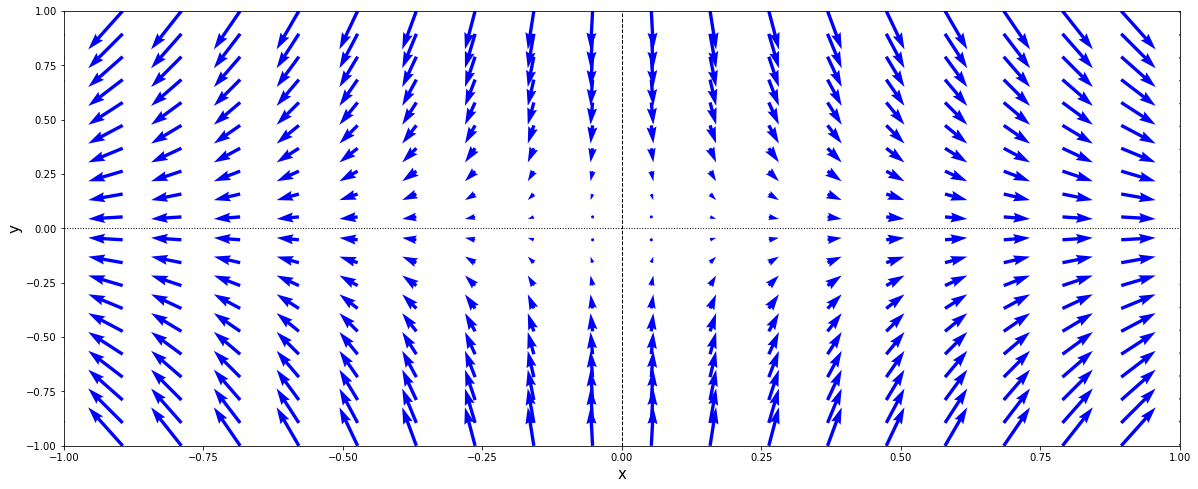

In [3]:
def f (x, y):
    return x 

def g (x, y):
    return  -y

#vector fields
X, Y = np.mgrid[-1:1:20j,  -1:1:20j ]
dx, dy =  f(X, Y), g(X, Y)

# ------ Plot ----------
fig, ax=plt.subplots(1, figsize=(20,8))

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=1.)

# Plot de Nullclines
ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=1)
ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=1)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

plt.show()


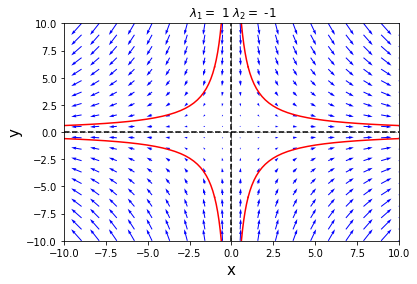

In [5]:
# ----- Example saddle 1
a, b, c, d = 1, 0, 0, -1
# initial conditions for the trajectories
init_cond = [  (-1, 6),  (-1, -6),  (1, -6),  (1, 6)]


#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 

def manifold (x, point_eq, eig_vec):
    if (eig_vec[0] == 0):
        return 0
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=1)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
if (y_manifold_2 == 0):
    ax.vlines(0, Y_range[0], Y_range[1],  linestyles='dashed')
else :
    ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

text =f" $\lambda_1 =$ {a} $\lambda_2 =$ {d}"
ax.set_title(text) 

plt.show()




*Solución:*

\begin{align}
\dot x = & x \\
\dot y = & - y
\end{align}

\begin{example}
Determine el sistema de ODE compatible con los siguientes campos vectoriales. ¿Cuáles son las nulclinas? 

\end{example}

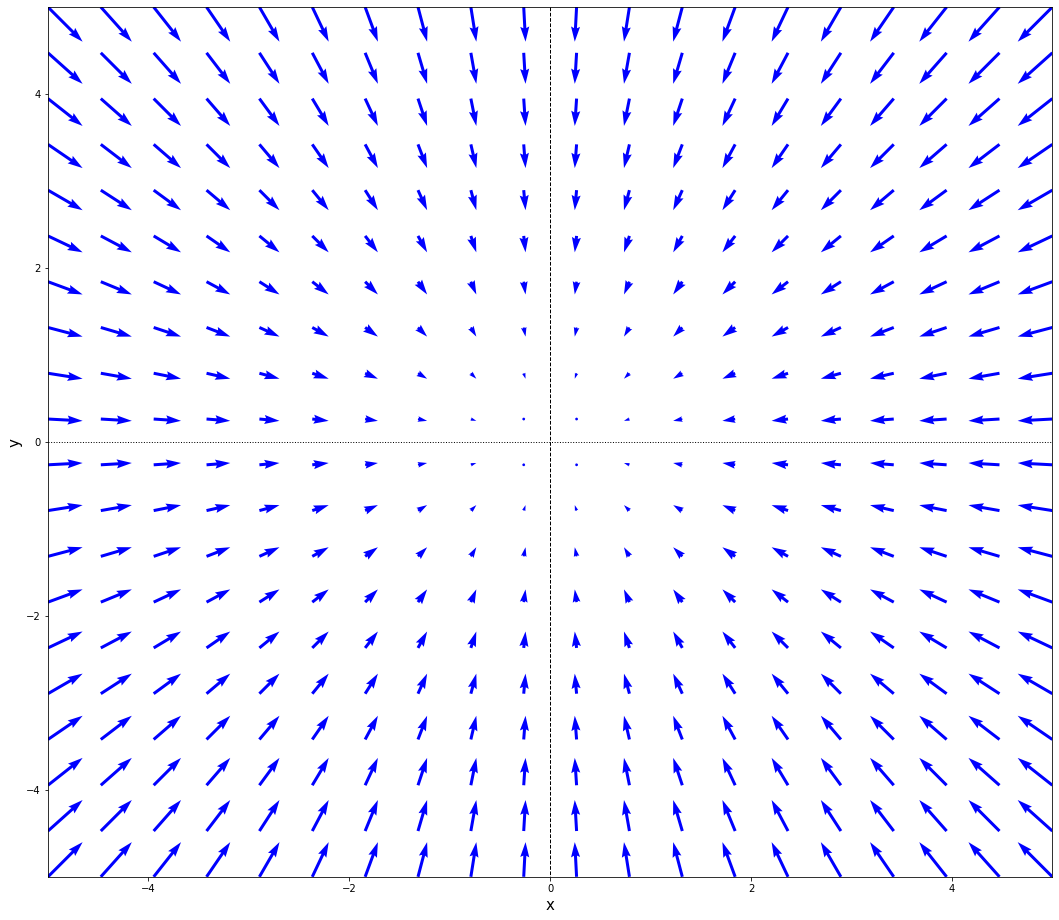

In [7]:
def f (x, y):
    return -x 

def g (x, y):
    return  -y

#vector fields
X, Y = np.mgrid[-5:5:20j,  -5:5:20j ]
dx, dy =  f(X, Y), g(X, Y)

# ------ Plot ----------
fig, ax=plt.subplots(1, figsize=(18,16))

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=1.)

# Plot de Nullclines
ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=1)
ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=1)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
#plt.grid()
plt.show()


<img src='./imagenes/fields.jpg' width='800' height='400'/>


## Sistemas lineales de ODEs

Suponga el sistema de ODEs lineal
\begin{align}
\dot x = & a x + b y \\
\dot y = & c x + d y
\end{align}
El sistema anterior se puede escribir en forma matricial como
$$
\dot{\vec{x}} = A \vec{x}
$$
donde $A$ es la matriz de coeficientes
$$
 A =  \left(
\begin{array}{c c} 
a & b    \\
c &  d 
\end{array}
\right)  
$$
Obtendremos la solución analítica, $x=x(t)$ e $y=y(t)$, primero en el caso en que la matriz $A$ sea diagonal y después en el caso general.

### Solución del sistema lineal cuando $A$ es diagonal:

Supongamos la matriz de coeficientes $A$
$$
 A =  \left(
\begin{array}{c c} 
\lambda_1 & 0    \\
0 &  \lambda_2
\end{array}
\right)  
$$
y asumamos que $\lambda_1 \neq \lambda_2$ con $\lambda_1, \lambda_2  \neq 0$

* En este caso las ecuaciones diferenciales $\dot x$ y $\dot y$ están desacopladas
\begin{align}
\dot x = &  \lambda_1 x \\
\dot y = &  \lambda_2 y 
\end{align}
y pueden resolverse indpendientemente. Aplicando separación de variables obtenemos
\begin{align}
x(t) = &  c_1 e^{\lambda_1 t} \\
y(t) = & c_2 e^{\lambda_1 t} 
\end{align}
donde $c_1$ y $c_2$ dependerán de las condiciones iniciales.

\begin{remark}

* Recuerda del álgebra lineal que si $A$ es una matriz, el vector $\vec{u}$ es un autovector con autovalor $\lambda$ si satisface la igualdad
$$
A \vec{u} = \lambda \vec{u} 
$$

* Al ser la matriz $A$ diagonal, los autovalores son los elementos de la diagonal  $\lambda_1$ y $\lambda_2$ y los autovectores $u_1 = (1, 0)^T$ y  $u_2 = (0, 1)^T$, es decir los ejes $x$ e $y$. 

\end{remark}

* La solución del sistema puede  expresarse en función de los autovectores  
$$
\vec{x}(t) = c_1  e^{\lambda_1 t} (1,0)^T +  c_2  e^{\lambda_2 t} (0,1)^T
$$

* Analicemos el comportamiento de las trayectorias para diferentes valores de las condiciones iniciales $c_1$ y $c_2$ para $t=0$:

 1. $c_1 \neq 0$ y $c_2=0$. Inicialmente el sistema se encuentra en un punto $x_0$ del eje $x$. A medida que transcurre el tiempo, $t \rightarrow \infty$, la trayectoria se aproximará al origen de coordenadas (punto crítico) si $\lambda_1 < 0$ o se alejará de él si $\lambda_1 > 0$ siguiendo una trayectoria paralela al autovector $\vec{u}_1 = (1,0)^T$.
En ambos casos, como $y(t)=0$ para todo $t$ $(c_2=0)$, la trayectoria permanecerá en el eje $x$.
 
 2. $c_2 \neq 0$ y $c_1=0$: en este caso las condiciones iniciales son $(0, y_0)$. Cuando $t \rightarrow \infty$ la trayectoria permanece en la recta definida por el autovector $\vec{u}_2 = (0,1)^T$ y el punto crítico alejándose de él si $\lambda_2 >0$ o aproximándose cuando   $\lambda_2 <0$. 
 
 3. Para las condiciones iniciales $c_1 \neq 0$ y $c_2 \neq 0$ la trayectoria seguida para $t \rightarrow \infty$  será una combinación lineal de ambos movimientos. La pendiente de la trayectoria en cada punto dependerá del cociente $\frac{\dot{y}}{\dot{x}}$. Por ejemplo, cuando el sistema se encuentre en un punto del plano de fases en el que la componente $x$ del vector de campo $f(x. y) \approx 0$, la trayectoria será aproximadamente paralela al eje $y$ (es decir el eje $\vec{u}_2)$ mientras que cuando $g(x.y) \ll f(x,y)$ la trayectoria tenderá a ser *paralela* al autovector $\vec{u}_1$, eje $x$.

\begin{exercise}
Suponga que la matriz de coeficientes $A$ es diagonal

$$
 A =  \left(
\begin{array}{c c} 
\lambda_1 & 0    \\
0 &  \lambda_2
\end{array}
\right)  
$$
¿Cuál será el plano de fase y trayectorias para los diferentes valores de $\lambda$?

* **Nodo estable:** $\lambda_1 =  -0.3$, $\lambda_2 = -1$.
Comprueba tus resultados representando las trayectorias para, por ejemplo, las siguientes condiciones iniciales $(x_0, y_0)$ = {  (-2.5, 6), (-3, 2.5),  (-2.5, -6), (-3, -2.5),  (2.5, -6), (3, -2.5),  (2.5, 6), (3, 2.5)}

* **Nodo estable:** $\lambda_1 =  -3$, $\lambda_2 = -1$.
Pruebe con las siguientes condiciones iniciales $(x_0, y_0)$ = {
(-2.5, 6), (-3, 2.5),  (-2.5, -6), (-3, -2.5),  (2.5, -6), (3, -2.5),  (2.5, 6), (3, 2.5)}

* **Nodo estable:** $\lambda_1 =  -1$, $\lambda_2 = -1$.

* **Punto de silla**: $\lambda_1 =  0.4$, $\lambda_2 = -1$.


\end{exercise}

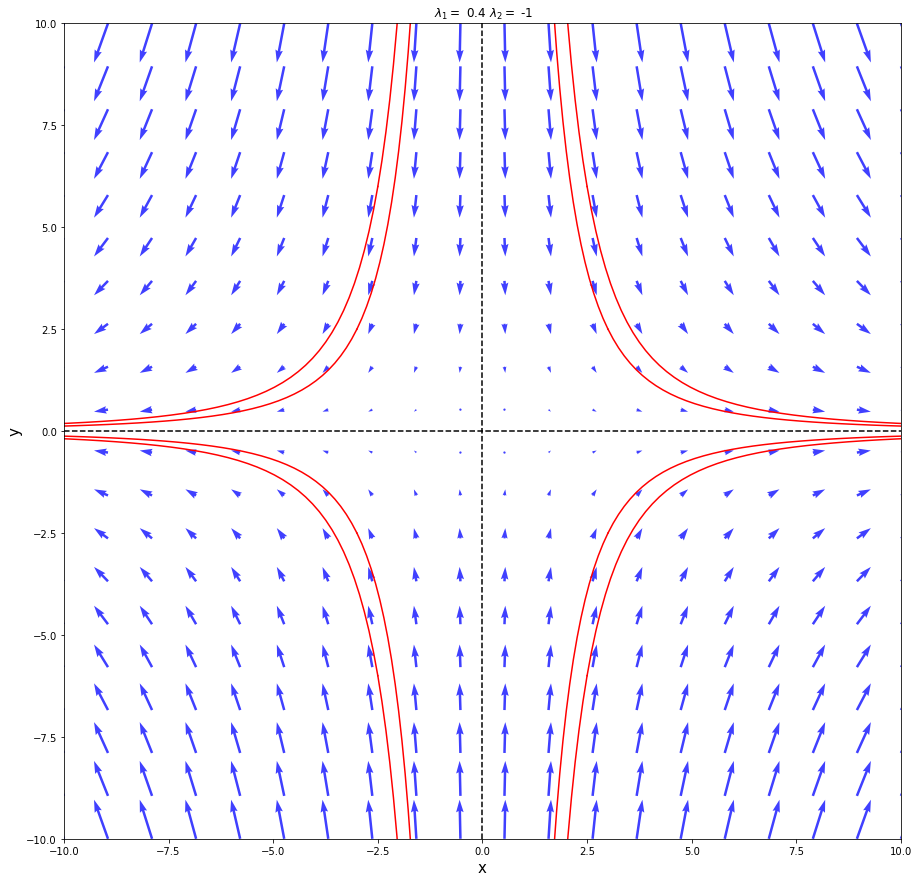

In [10]:
#------------ Example focus 1
a, b, c, d = 0.4, 0, 0, -1
# initial conditions for the trajectories
init_cond = [  (-2.5, 6), (-3, 2.5),  (-2.5, -6), (-3, -2.5),  (2.5, -6), (3, -2.5),  (2.5, 6), (3, 2.5)]


#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 

def manifold (x, point_eq, eig_vec):
    if (eig_vec[0] == 0):
        return 0
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1, figsize=(15,15))

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.75)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
if (y_manifold_2 == 0):
    ax.vlines(0, Y_range[0], Y_range[1],  linestyles='dashed')
else :
    ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

text =f" $\lambda_1 =$ {a} $\lambda_2 =$ {d}"
ax.set_title(text) 

plt.show()





### Solución del sistema lineal cuando $A$ no es diagonal:

* En el caso general (lineal) $\dot{\vec{x}} = A \vec{x}$ la matriz $A$ no será diagonal 

$$
 A =  \left(
\begin{array}{c c} 
a & b    \\
c &  d 
\end{array}
\right)  
$$

* Sin embargo, si $\vec{u_i}$ es un autovector de la matriz $A$ asociado al autovalor $\lambda_i$, entonces 
$\vec{x} = \vec{u_i} e^{\lambda_i t}$ es solución del sistema  de ODEs (compruébalo).

* Al ser el sistema de ecuaciones diferenciales lineal, si $\vec{x}_1$ y $\vec{x}_2$ son soluciones del sistema  también lo será cualquier combinación lineal de ambas, $c_1 \vec{x}_1 + c_2 \vec{x}_2$.
Como $\vec{u}_1$ y $\vec{u}_2$ son autovectores de $A$
$$
\vec{x}(t) = c_1 \vec{u_1} e^{\lambda_1 t} +  c_2 \vec{u_2} e^{\lambda_2 t}
$$
es la solución general del ODEs 
donde $c_1$ y $c_2$ dependerán de las condiciones iniciales $(x_0, y_0)$.

* Al ser, en general, la matriz $A$ no diagonal los autovectores no coincidirán con los ejes $x$ e $y$ (es decir están *girados* respecto a los ejes) pero el comportamiento de las trayectorias en función de las condiciones iniciales es equivalente: 
 1. Si los autovalores $\lambda_1$ y $\lambda_2$ son reales y distintos y como condiciones iniciales se elige un punto del plano de fase situado sobre una de las dos rectas que pasan por el punto de equilibrio, en este caso el $(0,0)$, y que son paralelas a los autovectores $\vec{u}_i$, la trayectoria para $t \rightarrow \infty$  (y $t \rightarrow -\infty$) se mantendrá en dicha recta y se aproximará o alejará del punto de equilibrio en función del signo de $\lambda_i$. 

 2. Si las condiciones iniciales **no** se sitúan sobre una de las dos rectas paralelas a los autovectores, la trayectoria será una combinación lineal de ambos movimientos

\begin{remark}
 
* Recordad que para hallar los autovalores  de una matriz debemos obtener las raíces del polinomio característico 
$$
 \mbox{det} \left|
\begin{array}{c c} 
a-\lambda & b    \\
c &  d-\lambda 
\end{array}
\right|  = 0
$$
 y, por tanto, resolver la ecuación  $(a- \lambda) (d-\lambda) - c b = 0$.

* La ecuación anterior puede expresarse en términos de la traza $\tau$ y el determinante $\Delta$ de la matriz $A$
 $$
 \lambda^2 - \tau \lambda + \Delta = 0
 $$
 donde
 $\tau = a+d $ y $\Delta = ad -bc$

* Las soluciones de la ecuación cuadrática son:
 \begin{align}
\lambda_{1,2} = & \frac{\tau \pm \sqrt{\tau^2 - a \Delta} }{2} \\
\end{align}
 
* Los autovectores  $\vec{u_1}$ y $\vec{u_2}$ asociados a los autovalores $\lambda_1$ y $\lambda_2$ respectivamente satisfacen la igualdad $A \vec{u}_i = \lambda_i \vec{u}_i$, es decir $(A - \lambda_i I)\vec{u}_i = 0$ siendo $I$ la matriz identidad.
\end{remark}

### Tipos de puntos críticos en el plano:

El sistema  $\dot{\vec{x}} = A \vec{x}$ al ser lineal tendrá, a lo sumo, un punto crítico. Sean $\lambda_1$ y $\lambda_2$ sus autovalores

#### Autovalores reales distintos

Cuando los dos autovalores $\lambda_1 $ y $\lambda_2$ son reales y distintos si
* Ambos son positivos: el punto crítico es un nodo (*node*) inestable
* Ambos son negativos, el punto crítico es un nodo estable
* Son de distinto signo, el punto crítico es un punto de silla (*saddle*)

#### Autovalores imaginarios

Cuando los autovalores son complejos, necesariamente $\lambda_1$ y $\lambda_2$ son complejos conjugados 
 * Si $\Re(\lambda) < 0 $, el punto crítico es una espiral (*focus*) Estable
 * Si $\Re(\lambda) > 0 $, el punto crítico es una espiral inestable

<img src='./imagenes/espiral.jpg' width='400' height='400'/>

 * Si $\Re(\lambda) = 0 $, el punto crítico es un centro

<img src='./imagenes/centro.jpg' width='200' height='200'/>

####  Clasificación de los puntos críticos

Los puntos críticos también pueden clasificarse en función del valor de la traza $\tau$ $(\tau= a +d)$ y del determinante $\Delta$ de la matriz de coeficientes. Teniendo en cuenta que los autovalores pueden expresarse como:

\begin{align}
\lambda_{1,2} = & \frac{\tau \pm \sqrt{\tau^2 - 4 \Delta} }{2} \\
\end{align}
$\lambda_1$ y $\lambda_2$ serán reales cuando $\tau^2 - 4 \Delta \geq 0$ y complejos conjugados cuando $\tau^2 - 4 \Delta < 0$
en la figura siguiente los diferentes tipos de puntos críticos se clasifican en función de los posibles valores de $\Delta$ (eje x) y $\tau$ (eje y)


<img src='./imagenes/pt_critico.jpg' width='700' height='700'/>

\begin{example}
Suponga el sistema lineal en el plano

\begin{align}
 \dot x = & 2 x + y \\
 \dot y = & x + 2y
\end{align}


Represente el espacio de fases e incluya algunas soluciones para diferentes condiciones iniciales

\end{example}

Solución analítica:

* La nulclina asociada a la variable $x$ es la curva $2x + y = 0$, por tanto $y = -2x$

* La nulclina asociada a la variable $y$ es
$x + 2y = 0$, $y = - \frac{1}{2} x$

* Al ser lineal, el sistema tendrá un único punto crítico en la intersección de las dos nulclinas $(0,0)$


* El sistema puede escribirse en forma matricial $\dot{\vec{x}} = A \vec{x}$ donde
$$
 A  = \left(
\begin{array}{c c} 
2 & 1    \\
1 & 2 
\end{array}
\right) 
$$
Para obtener los autovectores debe resolverse la ecuación $\mbox{det} (A- \lambda I) =0$
$$
\left|
\begin{array}{c c} 
2-\lambda & 1    \\
1 & 2-\lambda 
\end{array}
\right|  = 0
$$
obteniéndose el polinomio característico
$ \lambda^2 - 4 \lambda + 3 = 0 $, cuyas raices son $\lambda_1 = 1 $ y $\lambda_2 = 3$. 
 
* Al ser los **dos autovalores reales positivos**, el punto crítico $(0, 0)$ es un **nodo inestable**.  

* Los autovectores correspondientes a los autovalores $\lambda_i$,  $\left( A - \lambda_i I \right) \vec{u}_i = 0 $,  son $\vec{u}_1 = (1, -1)^T$ y $\vec{u}_2 = (1, 1)^T$. Los autovectores son ortogonales y forman un ángulo de $45^{\circ}$ con los ejes coordenados.

* La solución general del sistema de ODEś será
$$
\vec{x}(t) = c_1 e^t (1, -1)^T + c_2 e^{3t} (1,1)^T
$$
es decir,
\begin{align}
x(t) = &   c_1 e^t + c_2 e^{3t} \\
y(t) = & - c_1 e^t + c_2  e^{3t}
\end{align}


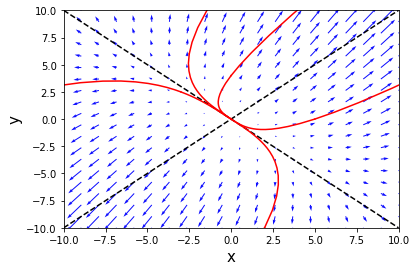

In [9]:

#---- Example nodo
a, b, c, d = 2, 1, 1, 2
# initial conditions for the trajectories
init_cond = [ (0, 4), (-2.5, 6), (2, -10), (5,0), (-3, 2.5)  ]


#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 

def manifold (x, point_eq, eig_vec):
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.95)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)  

#equilibrium point
y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

#plt.grid()
plt.show()



\begin{example}
Teniendo en cuenta los resultados del sistema dinámico anterior diseñe un nuevo sistema lineal cuyo punto crítico sea un nodo estable.

Solución:

Invirtiendo el sentido del tiempo. Para ello definimos el cambio de variable $\tau = -t$, para el que $d\tau = -dt$. Podemos re-escribir el sistema de ODE como 

\begin{align}
 \frac{dx}{d\tau} = & -2 x - y \\
 \frac{dy}{d\tau}  = & -x - 2y
\end{align}
 

\end{example}

\begin{example}
Analice el siguiente sistema de ODEs

\begin{align}
 \dot x = &  x + y \\
 \dot y = & 4x - 2y
\end{align}

Suponga que en $t=0$ las condiciones iniciales del sistema son $(x_0, y_0) = (2,-3)$
\end{example}


*Solución:*


* El sistema puede escribirse en forma matricial $\dot{\vec{x}} = A \vec{x}$ donde
$$
 A  = \left(
\begin{array}{c c} 
1 & 1    \\
4 & -2 
\end{array}
\right) 
$$

* El punto $(0, 0)$ es el único punto crítico del sistema.  

* Para calcular los autovalores $\lambda_1$  y $\lambda_2$ debe resolverse la ecuación $\mbox{det} (A- \lambda I) =0$
$$
\left|
\begin{array}{c c} 
1-\lambda & 1    \\
4 & -2-\lambda 
\end{array}
\right|  = 0
$$
obteniéndose el polinomio característico
$ \lambda^2 + \lambda -6 = 0 $, cuyas raíces son $\lambda_1 = 2 $ y $\lambda_2 = -6$. 
 
* Al ser los **dos autovalores reales y de diferente signo**, el punto crítico $(0, 0)$ es un **punto de silla**.

* Los autovectores correspondientes a los autovalores $\lambda_i$, son $\vec{u}_1 = (1, 1)^T$ y $\vec{u}_2 = (1, -4)^T$ respectivamente. 

Existe una región del espacio de fase que se denomina *variedad estable (stable manifold)*: si  las condiciones iniciales se localizan en la variedad estable, la trayectoria convergerá en $t \rightarrow \infty$ en el punto crítico.    Cuando, como en este caso, el sistema de ODE es lineal, la variedad estable es la recta paralela al autovector estable, el correspondiente a $\lambda < 0$, que pasa por el punto crítico. Sin embargo, en *los sistemas no-lineales, la variedad estable no tiene porqué ser una recta, de hecho casi nunca lo será.*  
De igual modo, el autovector asociado al autovalor inestable ($\lambda > 0$) define la variedad inestable.

* Con las condiciones iniciales dadas $ (x_0, y_0) = (2,-3)$ obtenemos $c_1 = 1$ y $c_2=1$ siendo por tanto la solución general,
\begin{align}
x(t) = &  e^{2t} + e^{-3t} \\
y(t) = &  e^{2t} - 4  e^{-3t}
\end{align}


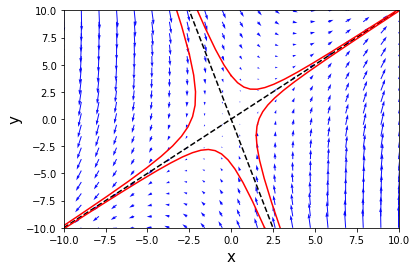

In [10]:
a, b, c, d = 1, 1, 4, -2

# initial conditions for the trajectories
init_cond = [(1.5, -1.5), (0, 4), (-2.5, 6), (2, -10) ]

#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 

def manifold (x, point_eq, eig_vec):
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)

#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 

#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.95)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')

    
ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

plt.show()



\begin{example}
Analice el siguiente sistema de ODEs

\begin{align}
 \dot x = &  -x - y \\
 \dot y = &   x - y
\end{align}

Suponga que en $t=0$ las condiciones iniciales del sistema son $(x_0, y_0) = (2,-3)$
\end{example}


*Solución:*

* Si resolvemos el polinomio característico obtenemos $ |A- \lambda I | =  \lambda^2 + 2 \lambda + 2 = 0 $, cuyas raíces son los autovalores complejos $\lambda_{1,2} = 1 \pm i $. 

* Al ser los autovalores complejos, el punto crítico es un foco (espiral). Además al ser la parte real menor que cero la espiral es inestable

/home/eduardo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/eduardo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


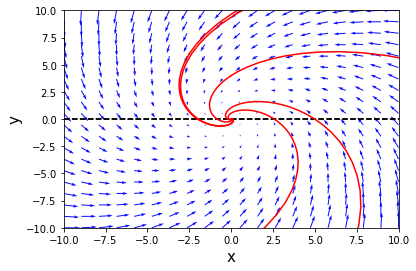

In [11]:
# ----- Example focus
a, b, c, d = -1, -1, 1, -1
# initial conditions for the trajectories
init_cond = [ (0, 4), (-2.5, 6), (2, -10), (5,0), (-3, 2.5)  ]

############### 

#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return f(x,y), g(x,y) 

def manifold (x, point_eq, eig_vec):
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.95)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

#plt.grid()
plt.show()



#### Autovalores iguales $(\lambda \neq 0)$

Hasta ahora hemos considerado que $\lambda_1 \neq \lambda_2$ ¿Qué ocurre si ambos autovalores son iguales? Existen dos posibilidades:
1. Aun teniendo un único autovalor, el sistema tiene dos autovectores $\vec{u}_1$ y $\vec{u}_2$ independientes. En ese caso **todo** vector del plano es un autovector de $A$

 *Demostración:*

 Supongamos un vector cualquiera $\vec{x}$. Podemos expresarlo como combinación lineal de los autovectores de $A$,
$\vec{x}_0 = c_1 \vec{u}_1 + c_2 \vec{u}_2 $. Aplicando la matriz $A$, $A \vec{x}_0 = A \left(  c_1 \vec{u}_1 + c_2 \vec{u}_2 \right) =  c_1 \ \lambda \vec{u}_1 + c_2 \lambda \vec{u}_2 = \lambda \vec{x}_0$.

 Pero esto implica que si $\vec{x}_0$ es un autovector $\vec{x}(t) = e^{\lambda t} \vec{x}_0$ es solución del sistema y por tanto *se aproxima (o se aleja dependiendo del signo de $\lambda$) en linea recta hacia el punto crítico*. El punto crítico es un nodo *en forma de estrella (star)*   

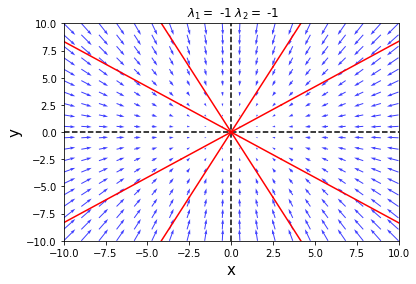

In [12]:

#----- Example star
a, b, c, d = -1, 0, 0, -1
# initial conditions for the trajectories
init_cond = [  (-2.5, 6), (-3, 2.5),  (-2.5, -6), (-3, -2.5),  (2.5, -6), (3, -2.5),  (2.5, 6), (3, 2.5)]


#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y) ]

def manifold (x, point_eq, eig_vec):
    if (eig_vec[0] == 0):
        return 0
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.75)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
if (y_manifold_2 == 0):
    ax.vlines(0, Y_range[0], Y_range[1],  linestyles='dashed')
else :
    ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

text =f" $\lambda_1 =$ {a} $\lambda_2 =$ {d}"
ax.set_title(text) 

plt.show()


2. Solo hay un autovector (por ejemplo cualquier matriz de la forma $
 A  = \left(
\begin{array}{c c} 
\lambda & b    \\
0 & \lambda 
\end{array}
\right) $
con $b \neq 0$ solo tiene un autovector). Se dice entonces que el punto crítico es un **nodo degenerado** . Las trayectorias para $ t \rightarrow \infty$ (o $ t \rightarrow -\infty$) serán paralelas al autovector.

 *Una manera de interpretar esta situación es pensar en un punto de silla en el que sus dos autovectores se van acercando hasta fusionarse en uno solo*

\begin{example}
Considere el sistema lineal

\begin{align}
 \dot x = &  -2x  \\
 \dot y = & -4  x - 2 y
\end{align}


\end{example}

Solución:
    
* El sistema tiene un único autovalor $\lambda_{1,2}=  -2$
* El sistema tiene un único autovector $(0, 1)^T$

/home/eduardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


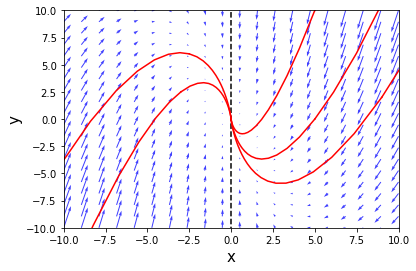

In [13]:
a, b, c, d = -2, 0, -4, -2
init_cond = [ (-2.5, 6), (5,0), (-3, 2.5), (9, 2), (5, 10)  ]

############### 

#  Jacobian matrix
A = np.array([[a,b], [c,d]])

def f (x, y):
    return a * x + b * y

def g (x, y):
    return c * x + d * y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 

def manifold (x, point_eq, eig_vec):
    y = eig_vec[1] * (x-point_eq[0])/ eig_vec[0] + point_eq[1]
    return y

#eigenvalues and eigenvectors
eig = np.linalg.eig(A)


#vector fields
X_range = (-10, 10)
Y_range = (-10, 10)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#trajectory forward time
time_max = 10
t_for = np.linspace(0.0, time_max , 100)
t_back = np.linspace(0.0, -time_max , 100) 
#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.75)

# Plot the eigenvectors
x = np.linspace( X_range[0], X_range[1], 1000)
p_crit = (0, 0)   #equilibrium point

y_manifold_1 = manifold(x, p_crit, eig[1][:,0])
y_manifold_2 = manifold(x, p_crit, eig[1][:,1])

ax.plot (x, y_manifold_1, 'k--')
ax.plot (x, y_manifold_2, 'k--')

# plot nulclinas
#ax.contour (X, Y, dx,  levels=[0], linewidths=1, linestyles='dashed', colors='black', alpha=0.5)
#ax.contour (X, Y, dy,  levels=[0], linewidths=1, linestyles='dotted', colors='black', alpha=0.5)

# plot some trajectories
for x0_y0 in init_cond :
    y_for = odeint (dx_dy, x0_y0, t_for)
    y_back = odeint (dx_dy, x0_y0, t_back)
    ax.plot (y_for[:,0], y_for[:,1], 'r') 
    ax.plot (y_back[:,0], y_back[:,1], 'r')
#ax.plot (y_back[:,0], y_back[:,1])

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)

#plt.grid()
plt.show()



## Sistema no-lineal

### Tipos y estabilidad de los puntos críticos

Supongamos el sistema de ODEs autónomo en dos dimesiones
\begin{align*}
\dot x = & f(x, y) \\
\dot y = & g(x, y)
\end{align*}
donde $f(x,y)$ y $g(x,y)$ son funciones no-lineales

* Al ser el sistema no-lineal podemos tener varios puntos críticos.

* Los tipos de puntos críticos que puede haber en los sistemas no-lineales de orden dos son los mismos que encontrábamos en los sistemas lineales de orden dos (nodos estables e inestables, espirales estables e inestables y puntos de silla). La única novedad *topológica* es que en los sistemas no-lineales además es posible observar **ciclos límites** (ver a continuación). 

* En los sistemas no-lineales las trayectorias en el plano de fases serán, en general, *mas complicadas* que en los sistemas lineales. Sin embargo, en las proximidades de los puntos críticos *se puede aproximar el sistema no-lineal por un sistema lineal* (teorema de Hartman) de forma que las trayectorias se aproximan por sus tangentes (gradientes). El procedimiento es equivalente al utilizado en el método de Euler para aproximar ecuaciones diferenciales.  

     Supongamos que $(x^*, y^*)$ es un punto de equilibrio del sistema no-lineal. Por simplicidad asumamos que $(x^*, y^*)$ es el punto $(0, 0)$. Si desarrollamos en serie de potencias el sistema de ODE en la proximidad del punto de equilibrio
\begin{align}
\dot x = & a x + b y + \text{higher-order terms}\\
\dot y = & c x + d y + \text{higher-order terms}
\end{align}
    donde los coeficientes $a, b, c$ y $d$ son las componentes de la matriz $J$ con los gradientes de $f(x,y)$ y $g(x,y)$
$$
 J  = 
 \left[
\begin{array}{c c} 
\frac{\partial f(x,y)}{\partial x} &  \frac{\partial f(x,y)}{\partial y}    \\
\frac{\partial g(x,y)}{\partial x} &  \frac{\partial g(x,y)}{\partial y } 
\end{array}
\right]
$$
evaluados en el punto crítico $(x^*, y^*)$, A la matriz $J$ se le denomina el Jacobiano del sistema.

* Una vez "linealizado" el sistema en las proximidades del punto crítico, es decir, una vez que hemos obtenido los coeficientes  $a, b, c$ y $d$, determinamos el tipo y estabilidad del punto crítico a partir del valor de sus autovalores. 

\begin{theorem} Teorema de Hartman

Suponga que $(u, v)$ es un punto crítico hiperbólico de
sistema (se dice que un un punto crítico es de tipo hiperbólico cuando la parte real de los autovalores son diferente de 0, es decir cuando el punto crítico no es degenerado). Existe un entorno del punto crítico en el que
el espacio de fases para el sistema no lineal se asemeja al del sistema linealizado. En otras palabras, si existe una transformación continua curvilínea de coordenadas que lleva de una a la otra en una pequeña región alrededor del punto crítico, los dos espacio de fases son topológicamente  equivalentes.


\end{theorem}


\begin{example}

Suponga el siguiente sistema no-lineal

\begin{align}
\dot x = & x \\
\dot y = & x^2 + y^2 - 1
\end{align}

Obtenga sus puntos críticos y analice su tipo y estabilidad

\end{example}

*Solución:*

* Las nulclinas son las curvas  $f(x,y)=0$ e $g(x,y)=0$. Es decir 
la recta $x=0$ y la circunferencia centrada en $(0,0)$ de radio 1 $y = \pm \sqrt{1- x^2}$

* Para hallar los puntos críticos debemos hallar la intersección de las dos nulclinas. Obteniéndose los dos puntos críticos $(0, 1)$ y $(0, -1)$

* Para analizar el tipo y estabilidad de los puntos críticos debemos estudiar el comportamiento de las trayectorias en las proximidades de cada uno de los puntos críticos. Para ello *linealizamos* el sistema no-lineal. 
El jacobiano será $ J  = 
 \left(
\begin{array}{c c} 
\frac{\partial f}{\partial x} &  \frac{\partial f}{\partial y}    \\
\frac{\partial g}{\partial x} &  \frac{\partial g}{\partial y } 
\end{array}
\right) 
 = 
 \left(
\begin{array}{c c} 
1 &  0    \\
2x  &  2y  
\end{array}
\right) 
$
* Si evaluamos el jacobiano para cada uno de los puntos críticos obtenemos
$J_{(0,1)} = 
\left(
\begin{array}{c c} 
1 &  0    \\
0  &  2  
\end{array}
\right) 
$ y 
$J_{(0,-1)} = 
\left(
\begin{array}{c c} 
1 &  0    \\
0  &  -2  
\end{array}
\right)
$

* Observamos que $(0,1)$ es un  **nodo inestable**, sus dos autovalores $\lambda_1 = 1$ y $\lambda_2 = 2$ son reales y mayores que cero, y $(0-1)$ es un **punto de silla**, sus dos autovalores son reales y de diferente signo.

* Además al ser las matrices de coeficientes $J_{(0,1)}$  y  $J_{(0,-1)}$ diagonales, los autovectores asociados a ambos puntos críticos son paralelos al eje $x$ y el eje $y$. Sin embargo al ser  no-lineal el sistema de ODEs, los autovectores son solo **localmente** paralelos a las variedades estable e inestable. A diferencia de los sistemas lineales en las que las variedades estable e inestable eran rectas, en los sistemas no-lineales generalmente serán curvas.
Por ejemplo, en el caso del punto de silla $(0. -1)$ el autovector asociado al autovalor estable es el eje $y$: en este caso la variedad estable es una recta. 
Sin embargo el autovector asociado al autovalor mayor de cero, paralelo al eje $x$ es tangente a la variedad inestable que es curva.  


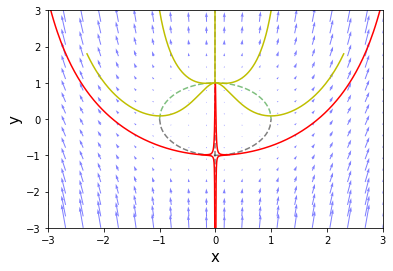

In [2]:
# Ejemplo node + saddle

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pylab as pl


def f (x, y):
    return x

def g (x, y):
    return  (x**2 + y**2 - 1)

def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 


#vector fields
X_range = (-3, 3)
Y_range = (-3, 3)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

#----------- Plot
fig, ax=plt.subplots(1)

# Plot the vector field
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)

# Plot the nullclines
x = np.linspace(-1, 1, 100)
y_null1 = np.sqrt(1 - x**2)
y_null2 = -np.sqrt(1-x**2)
ax.plot(x, y_null1,  'g--', x, y_null2, 'k--', alpha=0.5)
ax.vlines (0, X_range[0], X_range[1], linestyles='dashed', alpha=0.5)

# forward trayectories
time_max = 5.75
t_for = np.linspace(0.0, time_max , 500)
ic = [(0.0008, 0.99), (-0.0008, 0.99), (0.01,-3),  (-0.01,-3) ]
for x_0 in ic:
    x0_y0 = x_0 
    y = odeint (dx_dy, x0_y0, t_for)
    ax.plot (y[:,0], y[:,1], 'r') 

# backward
time_max = 4 
t_bak = np.linspace(0.0, -time_max , 500)   
ic = [ (-2.3, 1.8), (2.3, 1.8), (1, 3), (-1, 3), (0, 5) ] 
for x_0 in ic:
    x0_y0 = x_0 
    y = odeint (dx_dy, x0_y0, t_bak)
    ax.plot (y[:,0], y[:,1], 'y')     
 
ax.set_xlim(X_range)
ax.set_ylim(Y_range)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)      
plt.show()   
    

Para hallar las raíces del polinomio característico podemos ayudarnos de una rutina numérica o bien mediante un programa de cálculo simbólico, por ejemplo Mapple, Mathematica o el paquete sympy de Python.

\begin{remark} 

Ejemplo del cálculo de los puntos críticos y sus autovalores utilizando el paquete sympy

```.python
import sympy as sm
x, y = sm.symbols('x, y')
f = x
g = x**2 + y**2 -  1

# Get the critical points setting f(x,y)=0 and g(x,y)=0.
f_eqn = sm.Eq(f, 0)
g_eqn = sm.Eq(g, 0)
criticalpoints = sm.solve((f_eqn, g_eqn), x, y)
print(criticalpoints)

# Jacobian
X_j = sm.Matrix ([f, g])
Y_j = sm.Matrix ([x, y])
J = X_j.jacobian(Y_j)

# Eval jacobian at the critical points and gets its eiegenvalues:
for cp in criticalpoints :
    print (cp)
    values =  {'x' : cp[0], 'y':cp[1] }
    M = J.subs(values)
    print( M.eigenvals())

# From Matrix to numpy array
M_array = np.array(M).astype(np.float64)

```
\end{remark}

In [7]:
import sympy as sm
x, y = sm.symbols('x, y')
#f = x
#g = x**2 + y**2 -  1
f = x*(3-x-2*y)
g = y*(2-x-y)

# Get the critical points setting f(x,y)=0 and g(x,y)=0.
f_eqn = sm.Eq(f, 0)
g_eqn = sm.Eq(g, 0)
criticalpoints = sm.solve((f_eqn, g_eqn), x, y)
print("Critical points:", criticalpoints)


# Jacobian
X_j = sm.Matrix ([f, g])
Y_j = sm.Matrix ([x, y])
J = X_j.jacobian(Y_j)



# Eval jacobian at the critical points and gets its eiegenvalues:
for cp in criticalpoints :
    print ("* Critical point:", cp)
    values =  {'x' : cp[0], 'y':cp[1] }
    M = J.subs(values)
    print( 'Eigenvalues:', M.eigenvals())
   
# From Matrix to numpy array
M_array = np.array(M).astype(np.float64)

Eq(x*(-x - 2*y + 3), 0)
Critical points: [(0, 0), (0, 2), (1, 1), (3, 0)]
* Critical point: (0, 0)
Eigenvalues: {3: 1, 2: 1}
* Critical point: (0, 2)
Eigenvalues: {-1: 1, -2: 1}
* Critical point: (1, 1)
Eigenvalues: {-sqrt(2) - 1: 1, -1 + sqrt(2): 1}
* Critical point: (3, 0)
Eigenvalues: {-3: 1, -1: 1}


\begin{remark}

Ejemplo de cálculo de los autovalores y autovectores utilizando un algoritmo numérico. 

* Notad como el algoritmo para hallar las raíces necesita del sistema de ecuaciones necesita proporcionar una semilla.
* La función `spicy.optimize.root` admite diferentes algoritmos para calcular las raíces. En esta implementación le facilitemos el Jacobiano del sistema como uno de los parámetros de entrada de la función.

```python
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value 
    of the jacobian''' 
    x = u[0]
    y = u[1]
    f = x
    g = x**2 + y**2 - 1 
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [1, 0], [2*x, 2*y] ] )
    return eqn, jacobiano

# Using a seed to find the critical points
c_seed =[(0,-1), (0, 1)]    
for cp in c_seed : 
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_p = sol.x
    print(f'{c_p} ¿Is it a critical point: {fun_root(c_p)[0]}' ) 
    jacob = fun_root(c_p)[1] 
    # Get the eigenvalues
    eigen = np.linalg.eig (jacob)
    print(eigen)
``` 
\end{remark}

In [17]:
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value 
    of the jacobian''' 
    x = u[0]
    y = u[1]
    f = x
    g = x**2 + y**2 - 1 
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [1, 0], [2*x, 2*y] ] )
    return eqn, jacobiano

# Using a seed to find the critical points
c_seed =[(0,-1), (0, 1)]    
for cp in c_seed : 
    # Critical point
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_p = sol.x  
    
    print(f'{c_p} ¿Is it a critical point: {fun_root(c_p)[0]}' ) 
    # Get the eigenvalues
    jacob = fun_root(c_p)[1] 
    eigen = np.linalg.eig (jacob)
    print(eigen)

[ 0. -1.] ¿Is it a critical point: [0. 0.]
(array([ 1., -2.]), array([[1., 0.],
       [0., 1.]]))
[0. 1.] ¿Is it a critical point: [0. 0.]
(array([1., 2.]), array([[1., 0.],
       [0., 1.]]))


### Ciclos límites

Un ciclo límite es una trayectoria cerrada aislada. *Aislada* significa que en su entorno las trayectorias **no** son cerradas: son espirales que convergen al ciclo límite (si este es estable) o divergen de él, cuando es inestable.

<img src='./imagenes/ciclo.jpg' width='500' height='500'/>

\begin{example}

* Analiza el sistema, nulclinas, puntos críticos, variedades (estables e inestables) y separatrices 

\begin{align}
\dot x = & y \\
\dot y = & x (1 - x^2) + y
\end{align}

* Explora el plano de fases para buscar ciclos límites

\end{example}

In [19]:
# Finding critical points.
import sympy as sm
x, y = sm.symbols('x, y')
f = y
g = x * (1 - x**2 ) +  y
# Set P(x,y)=0 and Q(x,y)=0.
f_eqn = sm.Eq(f, 0)
g_eqn = sm.Eq(g, 0)
criticalpoints = sm.solve((f_eqn, g_eqn), x, y)

print("Critical points:", criticalpoints)

# Jacobian
X_j = sm.Matrix ([f, g])
Y_j = sm.Matrix ([x, y])
J = X_j.jacobian(Y_j)

# Eval jacobian for the critical points and gets its eiegenvalues:
for cp in criticalpoints :
    print ("* Critical point:", cp)
    values =  {'x' : cp[0], 'y':cp[1] }
    M = J.subs(values)
    print( 'Eigenvalues:', M.eigenvals())
    

Critical points: [(-1, 0), (0, 0), (1, 0)]
* Critical point: (-1, 0)
Eigenvalues: {1/2 - sqrt(7)*I/2: 1, 1/2 + sqrt(7)*I/2: 1}
* Critical point: (0, 0)
Eigenvalues: {1/2 - sqrt(5)/2: 1, 1/2 + sqrt(5)/2: 1}
* Critical point: (1, 0)
Eigenvalues: {1/2 - sqrt(7)*I/2: 1, 1/2 + sqrt(7)*I/2: 1}


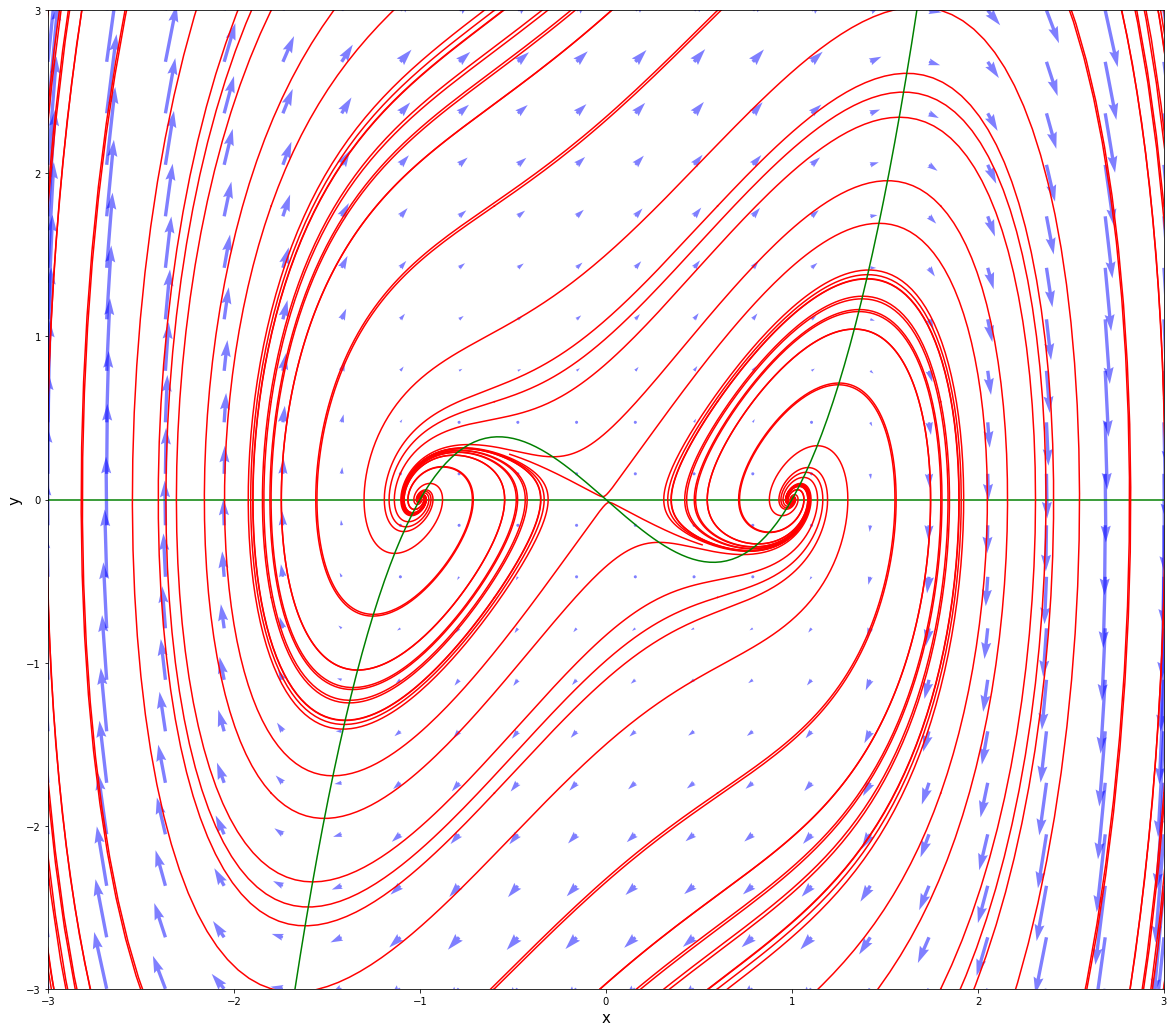

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pylab as pl


def f (x, y):
    return y

def g (x, y):
    return  x* (1 - x**2) +y


def dx_dy (state, t):
    x = state[0]
    y = state[1]
    return [f(x,y), g(x,y)] 




#----------- Plot--------
fig, ax=plt.subplots(1, figsize=(20,18))

# vector field
X_range = (-3, 3)
Y_range = (-3, 3)
X, Y = np.mgrid[X_range[0]:X_range[1]:20j,  Y_range[0]:Y_range[1]:20j ]
dx, dy =  f(X, Y), g(X, Y)

ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)


# trayectories forward
time_max = 10
t_for = np.linspace(0.0, time_max , 500)
ic = np.linspace( -3, 3, 6)
for x_0 in ic:
    for y_0 in ic :
        x0_y0 = [x_0, y_0]
        y = odeint (dx_dy, x0_y0, t_for)
        ax.plot (y[:,0], y[:,1], 'r') 
  
      
# trayectories backward
t_back = np.linspace(0.0, -time_max , 500) 
for x_0 in ic:
    for y_0 in ic :
        x0_y0 = [x_0, y_0]
        y = odeint (dx_dy, x0_y0, t_back)
        ax.plot (y[:,0], y[:,1], 'r') 

#nulclines        
y_nul = lambda x : -x * (1-x**2)
x_nul = np.linspace( X_range[0], X_range[1], 200)
ax.plot (x_nul, y_nul(x_nul) , 'g' )
ax.hlines (0, X_range[0], X_range[1], color='green')

ax.set_xlim(X_range)
ax.set_ylim(Y_range);
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)      
plt.show()

\begin{example} Modelo de FitzHugh-Nagumo

\begin{align}
\dot u = & -u (u-\theta) (u-1) -v + w \\
\dot v = & \epsilon (u -\gamma v)
\end{align}
donde $u$ representa el potencial de membrana (excitación), $v$ una variable de recuperación y los parámetros $0 < \theta < 1$ y $\gamma \geq 0$. El parámetro $\epsilon$ determina la diferencia de escala de tiempo entre los dos procesos.
Este modelo está basado en el oscilador de Van der Pol. 
Para discutir el comportamiento dinámico del sistema es útil expresar el modelo como:

\begin{align}
\dot u = & F(u) - v  \\
\dot v = & \epsilon (u -\gamma v)
\end{align}
siendo el polinomio cúbico $F(u) =  u (u-\theta) (1-u) + w$ 



1. Considera los siguientes valores para los parámetros del modelo
$\gamma=1.5$, $\theta=0.14$, $w=0.112$ y $\epsilon=0.01$  

2. Analiza el comportamiento del modelo cuando $w= 0$ y el resto de valores de los parámetros no se modifican.

3. Analiza el comportamiento del modelo cuando aumentamos el valor de  el valor de $\gamma = 10$  ($w = 0$).

**Ayuda:** Bifurcación de Hopf.

\end{example}


*Solución:*

**1**

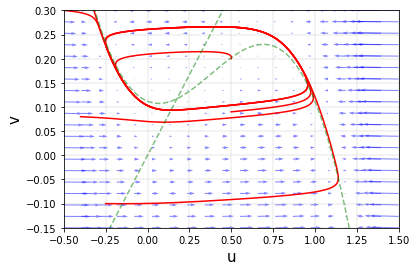

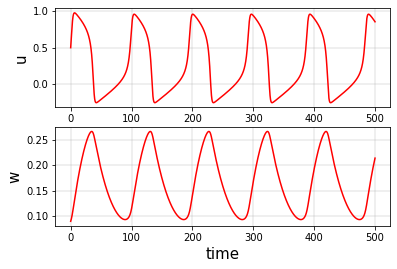

[0.17577436 0.11718291] ¿Es un punto de equilibrio: [0. 0.]
(array([0.07653783+0.04025947j, 0.07653783-0.04025947j]), array([[0.99503719+0.j        , 0.99503719-0.j        ],
       [0.09108355-0.04005967j, 0.09108355+0.04005967j]]))


In [3]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


theta = 0.14
omega = 0.112
#omega = 0.
gamma = 1.5
#gamma = 10
epsilon = 0.01;
xmin = -0.5
xmax = 1.5
ymin = -0.15
ymax = 0.3;

_gamma = 3/(1 -  theta + theta**2)

def f(x,y):
    return -x * (x - theta) * (x - 1) - y + omega

def g(x,y):
    return epsilon * (x - gamma * y)

def dx_dt(u, t):
    x = u[0]
    y = u[1]
    return [f(x,y), g(x,y)]


fig, ax=plt.subplots(1)
    
#vector fields
X, Y = np.mgrid[xmin:xmax:20j,  ymin:ymax:20j ]
dx, dy =  f(X, Y), g(X, Y)
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)

# Trajectories in forward time.
ts = np.linspace(0, 100, 1000)
ic = [ (0.5, 0.09), (-0.5, 0.3), (0.3, 1.5), (0.5, 0.2), (-0.4, 0.08), (-0.25, -0.1) ]
for x0_y0 in ic :
    xs=odeint(dx_dt, x0_y0, ts)
    ax.plot(xs[:,0], xs[:,1], "r-")


# Label the axes and set fontsizes.
ax.set_xlabel('u', fontsize=15)
ax.set_ylabel('v', fontsize=15)
#ax.set_tick_params(labelsize=15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax);
ax.grid(lw=0.3)

# Plot the nullclines.
x=np.arange(xmin, xmax, 0.01)
ax.plot(x, x/gamma, 'g--', x, -x * (x - theta) * (x - 1) + omega, 'g--', alpha=0.5)

plt.show()


#-------- Plot  x=ux(t) , y = y(t) --------
fig, ax=plt.subplots(2, 1)

ts = np.linspace(0, 500, 10000)
x0_y0 = (0.5, 0.09)
xs=odeint(dx_dt, x0_y0, ts)
ax[0].plot(ts, xs[:,0], "r-")
ax[1].plot(ts, xs[:,1], "r-")


ax[1].set_xlabel('time', fontsize=15)
ax[0].set_ylabel('u', fontsize=15)
ax[1].set_ylabel('w', fontsize=15)
ax[0].grid(lw=0.4)
ax[1].grid(lw=0.4)

plt.show()
     
####--------- Get the roots numerically
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value of the jacobian''' 
    x = u[0]
    y = u[1]
    f = -x * (x - theta) * (x - 1) - y + omega
    g = epsilon * (x - gamma * y)
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [-x *(x-theta) - x * (x-1) - (x-theta) * (x-1), -1], \
                    [epsilon, - epsilon * gamma]] )
    return eqn, jacobiano

# Using the "symbolic" critical points as a seed 
c_points = [(0, 0)]
#c_points =[(0,0), (0.2, 0.02), (0.8, 0.08)]    
for cp in c_points : 
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_point = sol.x
    print(f'{c_point} ¿Es un punto de equilibrio: {fun_root(c_point)[0]}' ) 
    jacob = fun_root(c_point)[1] 
    # Get the eigenvalues
    eigen = np.linalg.eig (jacob)
    print(eigen)
 

**2:** $w=0$

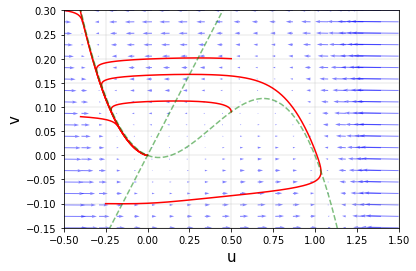

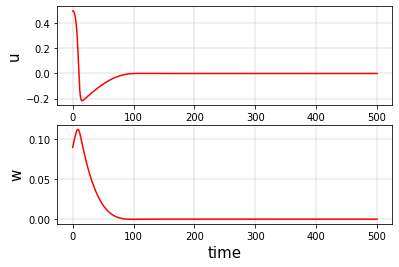

[0. 0.] ¿Es un punto de equilibrio: [0. 0.]
(array([-0.0775+0.07806247j, -0.0775-0.07806247j]), array([[ 0.99503719+0.j        ,  0.99503719-0.j        ],
       [-0.06218982-0.07767507j, -0.06218982+0.07767507j]]))


In [21]:

theta = 0.14
#omega = 0.112
omega = 0.
gamma = 1.5
#gamma = 10
epsilon = 0.01;
xmin = -0.5
xmax = 1.5
ymin = -0.15
ymax = 0.3;

def f(x,y):
    return -x * (x - theta) * (x - 1) - y + omega

def g(x,y):
    return epsilon * (x - gamma * y)

def dx_dt(u, t):
    x = u[0]
    y = u[1]
    return [f(x,y), g(x,y)]


fig, ax=plt.subplots(1)
    
#vector fields
X, Y = np.mgrid[xmin:xmax:20j,  ymin:ymax:20j ]
dx, dy =  f(X, Y), g(X, Y)
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)

# Trajectories in forward time.
ts = np.linspace(0, 100, 1000)
ic = [ (0.5, 0.09), (-0.5, 0.3), (0.3, 1.5), (0.5, 0.2), (-0.4, 0.08), (-0.25, -0.1) ]
for x0_y0 in ic :
    xs=odeint(dx_dt, x0_y0, ts)
    ax.plot(xs[:,0], xs[:,1], "r-")


# Label the axes and set fontsizes.
ax.set_xlabel('u', fontsize=15)
ax.set_ylabel('v', fontsize=15)
#ax.set_tick_params(labelsize=15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax);
ax.grid(lw=0.3)

# Plot the nullclines.
x=np.arange(xmin, xmax, 0.01)
ax.plot(x, x/gamma, 'g--', x, -x * (x - theta) * (x - 1) + omega, 'g--', alpha=0.5)

plt.show()


#-------- Plot  x=ux(t) , y = y(t) --------
fig, ax=plt.subplots(2, 1)

ts = np.linspace(0, 500, 10000)
x0_y0 = (0.5, 0.09)
xs=odeint(dx_dt, x0_y0, ts)
ax[0].plot(ts, xs[:,0], "r-")
ax[1].plot(ts, xs[:,1], "r-")


ax[1].set_xlabel('time', fontsize=15)
ax[0].set_ylabel('u', fontsize=15)
ax[1].set_ylabel('w', fontsize=15)
ax[0].grid(lw=0.4)
ax[1].grid(lw=0.4)

plt.show()
     
####--------- Get the roots numerically
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value of the jacobian''' 
    x = u[0]
    y = u[1]
    f = -x * (x - theta) * (x - 1) - y + omega
    g = epsilon * (x - gamma * y)
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [-x *(x-theta) - x * (x-1) - (x-theta) * (x-1), -1], \
                    [epsilon, - epsilon * gamma]] )
    return eqn, jacobiano

# Using the "symbolic" critical points as a seed 
c_points = [(0, 0)]
#c_points =[(0,0), (0.2, 0.02), (0.8, 0.08)]    
for cp in c_points : 
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_point = sol.x
    print(f'{c_point} ¿Es un punto de equilibrio: {fun_root(c_point)[0]}' ) 
    jacob = fun_root(c_point)[1] 
    # Get the eigenvalues
    eigen = np.linalg.eig (jacob)
    print(eigen)
 

**3:** $\gamma=10$

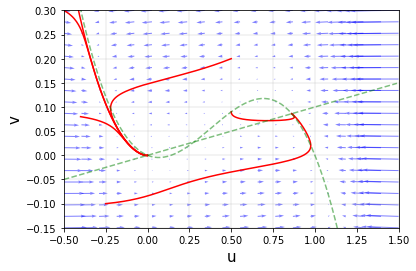

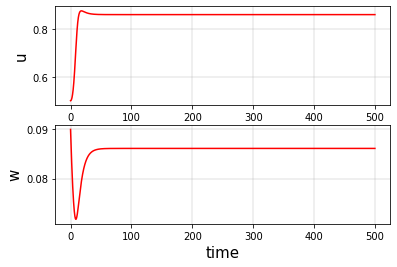

[0. 0.] ¿Es un punto de equilibrio: [0. 0.]
(array([-0.12+0.09797959j, -0.12-0.09797959j]), array([[ 0.99503719+0.j        ,  0.99503719-0.j        ],
       [-0.01990074-0.09749334j, -0.01990074+0.09749334j]]))
[0.27862395 0.0278624 ] ¿Es un punto de equilibrio: [-1.64104841e-15  0.00000000e+00]
(array([ 0.23227295, -0.06990426]), array([[0.99954743, 0.94898475],
       [0.03008212, 0.31532197]]))
[0.86137605 0.0861376 ] ¿Es un punto de equilibrio: [5.13478149e-16 0.00000000e+00]
(array([-0.36410496, -0.13786373]), array([[-0.99928394,  0.9668488 ],
       [ 0.03783662, -0.25534956]]))


In [23]:
   
 #################### FitzHugh-Naguno 22222222 ######################
 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


theta = 0.14
#omega = 0.112
omega = 0.
gamma = 10
#gamma = 10
epsilon = 0.01;
xmin = -0.5
xmax = 1.5
ymin = -0.15
ymax = 0.3;

def f(x,y):
    return -x * (x - theta) * (x - 1) - y + omega

def g(x,y):
    return epsilon * (x - gamma * y)

def dx_dt(u, t):
    x = u[0]
    y = u[1]
    return [f(x,y), g(x,y)]


fig, ax=plt.subplots(1)
    
#vector fields
X, Y = np.mgrid[xmin:xmax:20j,  ymin:ymax:20j ]
dx, dy =  f(X, Y), g(X, Y)
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)

# Trajectories in forward time.
ts = np.linspace(0, 100, 1000)
ic = [ (0.5, 0.09), (-0.5, 0.3), (0.3, 1.5), (0.5, 0.2), (-0.4, 0.08), (-0.25, -0.1) ]
for x0_y0 in ic :
    xs=odeint(dx_dt, x0_y0, ts)
    ax.plot(xs[:,0], xs[:,1], "r-")


# Label the axes and set fontsizes.
ax.set_xlabel('u', fontsize=15)
ax.set_ylabel('v', fontsize=15)
#ax.set_tick_params(labelsize=15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax);
ax.grid(lw=0.3)

# Plot the nullclines.
x=np.arange(xmin, xmax, 0.01)
ax.plot(x, x/gamma, 'g--', x, -x * (x - theta) * (x - 1) + omega, 'g--', alpha=0.5)

plt.show()


#-------- Plot  x=ux(t) , y = y(t) --------
fig, ax=plt.subplots(2, 1)

ts = np.linspace(0, 500, 10000)
x0_y0 = (0.5, 0.09)
xs=odeint(dx_dt, x0_y0, ts)
ax[0].plot(ts, xs[:,0], "r-")
ax[1].plot(ts, xs[:,1], "r-")


ax[1].set_xlabel('time', fontsize=15)
ax[0].set_ylabel('u', fontsize=15)
ax[1].set_ylabel('w', fontsize=15)
ax[0].grid(lw=0.4)
ax[1].grid(lw=0.4)

plt.show()
     
####--------- Get the roots numerically
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value of the jacobian''' 
    x = u[0]
    y = u[1]
    f = -x * (x - theta) * (x - 1) - y + omega
    g = epsilon * (x - gamma * y)
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [-x *(x-theta) - x * (x-1) - (x-theta) * (x-1), -1], \
                    [epsilon, - epsilon * gamma]] )
    return eqn, jacobiano

# Using the "symbolic" critical points as a seed 
# c_points = [(0, 0)]
c_points =[(0,0), (0.2, 0.02), (0.8, 0.08)]    
for cp in c_points : 
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_point = sol.x
    print(f'{c_point} ¿Es un punto de equilibrio: {fun_root(c_point)[0]}' ) 
    jacob = fun_root(c_point)[1] 
    # Get the eigenvalues
    eigen = np.linalg.eig (jacob)
    print(eigen)
 

\begin{exercise}

El siguiente modelo de Lotka-Volterra es una generalización del modelo logístico unidimensional de crecimiento de una única especie visto  anteriormente. En este modelo dos especies diferentes $x$ e $y$ compiten por los recursos

\begin{align}
\dot x = &  x (3- x -2y ) \\
\dot y = &  y (2-x-y)
\end{align}

Siguiendo la  nomenclatura utilizada en los sistemas unidimensionales, el sistema anterior podemos re-escribirlo como, 

\begin{align}
\dot x = &  3 x \left( 1- \frac{x}{3} -\frac{2}{3} y \right) \\
\dot y = &  2 y \left( 1- \frac{y}{2} - \frac{x}{2} \right)
\end{align}

donde se aprecia que los coeficientes de carga $K$ son 3 y 2.

\end{exercise}

In [ ]:
 #################### FitzHugh-Naguno 22222222 ######################
 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


theta = 0.14
omega = 0.112
gamma = 1.5
epsilon = 0.01;
xmin = -0.5
xmax = 1.5
ymin = -0.15
ymax = 0.3;

_gamma = 3/(1 -  theta + theta**2)

def f(x,y):
    return -x * (x - theta) * (x - 1) - y + omega

def g(x,y):
    return epsilon * (x - gamma * y)

def dx_dt(u, t):
    x = u[0]
    y = u[1]
    return [f(x,y), g(x,y)]


fig, ax=plt.subplots(1)
    
#vector fields
X, Y = np.mgrid[xmin:xmax:20j,  ymin:ymax:20j ]
dx, dy =  f(X, Y), g(X, Y)
ax.quiver(X, Y, dx, dy, color = 'b', alpha=0.5)

# Trajectories in forward time.
ts = np.linspace(0, 100, 1000)
ic = [ (0.5, 0.09), (-0.5, 0.3), (0.3, 1.5), (0.5, 0.2), (-0.4, 0.08), (-0.25, -0.1) ]
for x0_y0 in ic :
    xs=odeint(dx_dt, x0_y0, ts)
    ax.plot(xs[:,0], xs[:,1], "r-")


# Label the axes and set fontsizes.
ax.set_xlabel('u', fontsize=15)
ax.set_ylabel('v', fontsize=15)
#ax.set_tick_params(labelsize=15)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax);
ax.grid(lw=0.3)

# Plot the nullclines.
x=np.arange(xmin, xmax, 0.01)
ax.plot(x, x/gamma, 'g--', x, -x * (x - theta) * (x - 1) + omega, 'g--', alpha=0.5)

plt.show()


#-------- Plot  u=u(t) , w = w(t) --------
fig, ax=plt.subplots(2, 1)

ts = np.linspace(0, 500, 10000)
x0_y0 = (0.5, 0.09)
xs=odeint(dx_dt, x0_y0, ts)
ax[0].plot(ts, xs[:,0], "r-")
ax[1].plot(ts, xs[:,1], "r-")


ax[1].set_xlabel('time', fontsize=15)
ax[0].set_ylabel('u', fontsize=15)
ax[1].set_ylabel('w', fontsize=15)
ax[0].grid(lw=0.4)
ax[1].grid(lw=0.4)

plt.show()
     
####--------- Get the roots numerically
from scipy.optimize import root

def  fun_root (u) :
    '''return the objetive function along with the value of the jacobian''' 
    x = u[0]
    y = u[1]
    f = -x * (x - theta) * (x - 1) - y + omega
    g = epsilon * (x - gamma * y)
    eqn = np.array ( [f, g] )
    jacobiano = np.array([ [-x *(x-theta) - x * (x-1) - (x-theta) * (x-1), -1], \
                    [epsilon, - epsilon * gamma]] )
    return eqn, jacobiano

# Using the "symbolic" critical points as a seed 
c_points = [(0, 0)]
#c_points =[(0,0), (0.2, 0.02), (0.8, 0.08)]    
for cp in c_points : 
    sol = root(fun_root, cp, method='hybr', jac = True)
    c_point = sol.x
    print(f'Punto de equilibrio: {c_point}' ) 
    jacob = fun_root(c_point)[1] 
    # Get the eigenvalues
    eigen = np.linalg.eig (jacob)
    print(eigen)
 
    

**Referencias**
 
* S. H. Strogatz,Non linear dynamics and chaos, with applications to physics, biology, chemistry and enineering. ISBN : 0738204536, Cambridge Univ. Press (2014).

 **Comentario:** El autor es un reconocido científico y divulgador, su columna periódica en el *New York Times* no tiene desperdicio. En este libro Strogatz introduce los sistemas dinámicos con una gran sencillez y claridad, apoyándose en ejemplos extraídos de muy diversos campos. El formalismo matemático es mínimo y está al alcance de un estudiante de grado. Hay varios ejemplares en la biblioteca. La primera edición del libro se puede obtener fácilmente en la web.
 
 *“Exceptionally well-written. Time after time, Strogatz gives explanations of concepts that are among the most lucid I have ever read … One of the best introductions to nonlinear dynamics currently available.”*, SIAM Review
 


* S. Lynch, Dynamical Systems with Applications using Python, ISBN: 978-3-319-78145-7, Springer International Publishing Birkhäuser (2018).

 **Comentario:** Algunos de los ejemplos de estas notas provienen de este libro. Lo he elegido porque tenéis acceso electrónico en el repositorio de la biblioteca.